In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
conn = engine.connect()

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [ ]:
# We can view all of the classes that automap found

In [9]:
Base.classes.keys()

['measurement', 'station']

In [ ]:
# Save references to each table

In [10]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB

In [11]:
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
#This is for the query to retrieve the last 12 months of precipitation data and plot the results
my_max_id = session.query(func.max(Measurement.date)).scalar()
print(my_max_id)

2017-08-23


In [17]:
#This is to calculate the date 1 year ago from the last data point in the database
my_max_date = dt.date(2017, 8, 23)
one_year_ago = my_max_date - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [28]:
#This is to Perform a query to retrieve the data and precipitation scores
prec_data = [Measurement.date, Measurement.prcp]

precip_data = session.query(*prec_data).\
    filter(Measurement.date <= my_max_date).\
    filter(Measurement.date >= one_year_ago).all()

precip_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [29]:
# This to Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data, columns=['date', 'precip'])
precip_df

,date,precip
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [35]:
#To Sort the dataframe by date
percip_sort_df = precip_df.sort_values(by='date')
percip_sort_df

,date,precip
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


<function matplotlib.pyplot.show(*args, **kw)>

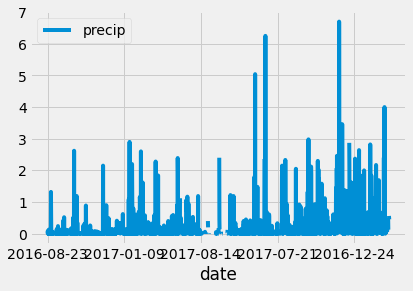

In [37]:
# Finally to Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date', y='precip')
plt.xlabel("date")
plt.show

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [41]:
precip_df.count()

date      2230
precip    2021
dtype: int64

In [42]:
precip_df.mean()

precip    0.177279
dtype: float64

In [43]:
precip_df.std()

precip    0.46119
dtype: float64

In [44]:
precip_df.min()

date      2016-08-23
precip             0
dtype: object

In [45]:
precip_df.max()

date      2017-08-23
precip           6.7
dtype: object

In [38]:
#I found out this function to put all the above statistic calculations in a table. It alsp added 25%, 50%, and 75% of the precipitation
precip_df.describe()

,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Design a query to show how many stations are available in this dataset?

In [47]:
no_of_stations = session.query(Station).group_by(Station.station).count()
no_of_stations

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [48]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [52]:
max_temp = session.query(func.max(Measurement.tobs)).all()
min_temp = session.query(func.min(Measurement.tobs)).all()
average_temp = session.query(func.avg(Measurement.tobs)).all()
print(max_temp, min_temp, average_temp)

[(87.0,)] [(53.0,)] [(73.09795396419437,)]


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [55]:
#this is to Choose the station with the highest number of temperature observations.
max_no_temp = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()

max_no_temp

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [61]:
temp_data = [Measurement.date, Measurement.tobs, Measurement.station]

temp_obs_data = session.query(*temp_data).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= my_max_date).\
    filter(Measurement.date <= one_year_ago).all()
temp_obs_data

[('2010-01-01', 70.0, 'USC00519281'),
 ('2010-01-02', 62.0, 'USC00519281'),
 ('2010-01-03', 74.0, 'USC00519281'),
 ('2010-01-04', 75.0, 'USC00519281'),
 ('2010-01-05', 74.0, 'USC00519281'),
 ('2010-01-06', 76.0, 'USC00519281'),
 ('2010-01-07', 69.0, 'USC00519281'),
 ('2010-01-08', 66.0, 'USC00519281'),
 ('2010-01-09', 70.0, 'USC00519281'),
 ('2010-01-10', 75.0, 'USC00519281'),
 ('2010-01-11', 64.0, 'USC00519281'),
 ('2010-01-12', 60.0, 'USC00519281'),
 ('2010-01-13', 61.0, 'USC00519281'),
 ('2010-01-14', 68.0, 'USC00519281'),
 ('2010-01-15', 64.0, 'USC00519281'),
 ('2010-01-16', 66.0, 'USC00519281'),
 ('2010-01-17', 67.0, 'USC00519281'),
 ('2010-01-18', 70.0, 'USC00519281'),
 ('2010-01-19', 67.0, 'USC00519281'),
 ('2010-01-20', 67.0, 'USC00519281'),
 ('2010-01-21', 69.0, 'USC00519281'),
 ('2010-01-22', 60.0, 'USC00519281'),
 ('2010-01-23', 75.0, 'USC00519281'),
 ('2010-01-24', 75.0, 'USC00519281'),
 ('2010-01-25', 65.0, 'USC00519281'),
 ('2010-01-26', 75.0, 'USC00519281'),
 ('2010-01-2

In [62]:
#To calculate a histogram I have to make a table
temp_obs_df = pd.DataFrame (temp_obs_data, columns = ['Date', 'Temp Obsv', 'Station'])
temp_obs_df

,Date,Temp Obsv,Station
0,2010-01-01,70.0,USC00519281
1,2010-01-02,62.0,USC00519281
2,2010-01-03,74.0,USC00519281
3,2010-01-04,75.0,USC00519281
4,2010-01-05,74.0,USC00519281
...,...,...,...
2416,2016-08-19,79.0,USC00519281
2417,2016-08-20,81.0,USC00519281
2418,2016-08-21,79.0,USC00519281
2419,2016-08-22,78.0,USC00519281


In [71]:
#To calculate a histogram I have to make a table
temp_obs_df = pd.DataFrame (temp_obs_data, columns = ['Date', 'Temp Obsv', 'Station'])

#Minor test to seee if it could print out all columns
temp_obs = temp_obs_df["Temp Obsv"]
#temp_obs
#To print Table
temp_obs_df

,Date,Temp Obsv,Station
0,2010-01-01,70.0,USC00519281
1,2010-01-02,62.0,USC00519281
2,2010-01-03,74.0,USC00519281
3,2010-01-04,75.0,USC00519281
4,2010-01-05,74.0,USC00519281
...,...,...,...
2416,2016-08-19,79.0,USC00519281
2417,2016-08-20,81.0,USC00519281
2418,2016-08-21,79.0,USC00519281
2419,2016-08-22,78.0,USC00519281


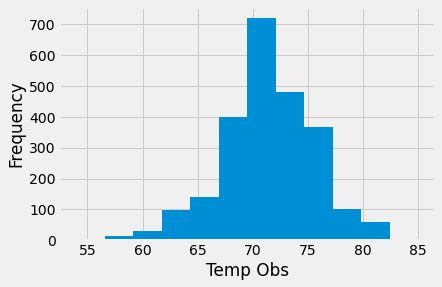

In [72]:
plt.hist(temp_obs, bins=12)
plt.xlabel('Temp Obs')
plt.ylabel('Frequency')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
